**k_nearest_neighbour**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [10]:
data = pd.read_csv("C:/Users/Samsung/Desktop/3.sınıf bahar dönemi/Introduction Machine Learning/data.csv")

In [11]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [13]:
data.drop(["Unnamed: 32","id"],axis=1,inplace=True)
#axis : {0 or 'index', 1 or 'columns'}, default 0
#inplace : bool, default False

In [14]:
M=data[data.diagnosis=="M"]
B=data[data.diagnosis=="B"]

In [15]:
M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 567
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                212 non-null    object 
 1   radius_mean              212 non-null    float64
 2   texture_mean             212 non-null    float64
 3   perimeter_mean           212 non-null    float64
 4   area_mean                212 non-null    float64
 5   smoothness_mean          212 non-null    float64
 6   compactness_mean         212 non-null    float64
 7   concavity_mean           212 non-null    float64
 8   concave points_mean      212 non-null    float64
 9   symmetry_mean            212 non-null    float64
 10  fractal_dimension_mean   212 non-null    float64
 11  radius_se                212 non-null    float64
 12  texture_se               212 non-null    float64
 13  perimeter_se             212 non-null    float64
 14  area_se                  2

In [16]:
B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 19 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                357 non-null    object 
 1   radius_mean              357 non-null    float64
 2   texture_mean             357 non-null    float64
 3   perimeter_mean           357 non-null    float64
 4   area_mean                357 non-null    float64
 5   smoothness_mean          357 non-null    float64
 6   compactness_mean         357 non-null    float64
 7   concavity_mean           357 non-null    float64
 8   concave points_mean      357 non-null    float64
 9   symmetry_mean            357 non-null    float64
 10  fractal_dimension_mean   357 non-null    float64
 11  radius_se                357 non-null    float64
 12  texture_se               357 non-null    float64
 13  perimeter_se             357 non-null    float64
 14  area_se                  

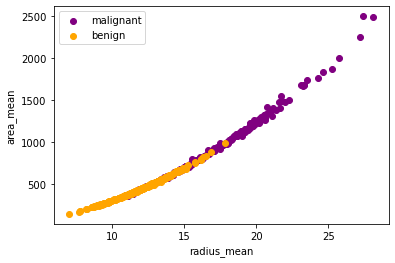

In [17]:
plt.scatter(M.radius_mean,M.area_mean,color="purple",label="malignant")
plt.scatter(B.radius_mean,B.area_mean,color="orange",label="benign")
plt.legend()
plt.xlabel("radius_mean")
plt.ylabel("area_mean")
plt.show()

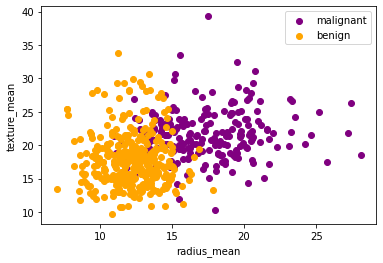

In [18]:
plt.scatter(M.radius_mean,M.texture_mean,color="purple",label="malignant")
plt.scatter(B.radius_mean,B.texture_mean,color="orange",label="benign")
plt.legend()
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.show()

In [19]:
data.diagnosis = [1 if each=="M" else 0 for each in data.diagnosis]

In [20]:
y = data.diagnosis.values

In [21]:
x_data= data.iloc[:,1:3].values

In [22]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
y_head = knn.predict(x_test)

In [26]:
y_head

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [27]:
knn.score(x_test,y_test)

0.8421052631578947

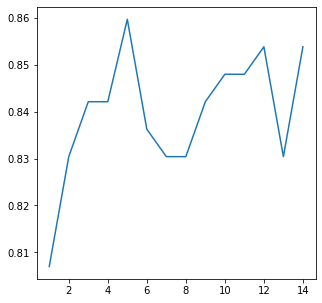

In [28]:
test_accuracy = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    test_accuracy.append(knn2.score(x_test,y_test))
    
plt.figure(figsize=(5,5))
plt.plot(range(1,15),test_accuracy)
plt.show()

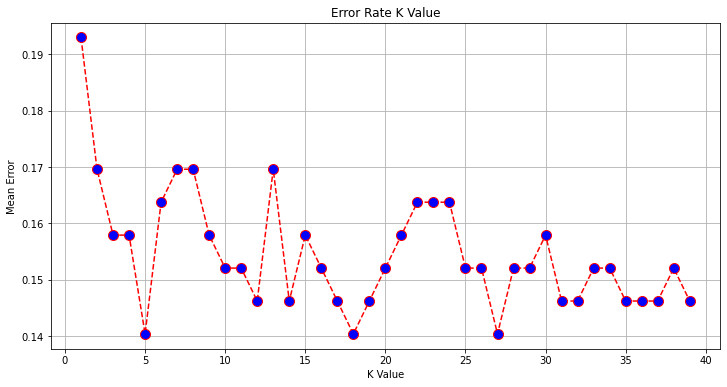

In [30]:
error = []
for i in range (1,40):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)
  error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid()
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_head)

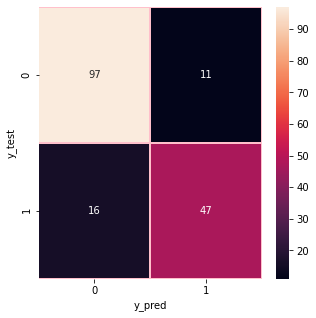

In [32]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm,annot=True,fmt= '.0f',linewidths=0.5,linecolor="pink",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

**Cross validation**

In [33]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

In [34]:
iris = load_iris()

In [35]:
X, y = iris.data, iris.target

In [36]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [37]:
model = LinearRegression()

In [38]:
scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    
    model.fit(X_train, y_train)
    

    y_pred = model.predict(X_test)
    score = mean_squared_error(y_test, y_pred)
    scores.append(score)

In [39]:
mean_score = np.mean(scores)

In [40]:
print("K-fold cross validation result: ", scores)
print("Mean Score: ", mean_score)

K-fold cross validation result:  [0.03711379440797693, 0.042877331697643746, 0.05339513046889765, 0.06316425044891769, 0.047794600654438336]
Mean Score:  0.04886902153557487


**Confusion matrix**

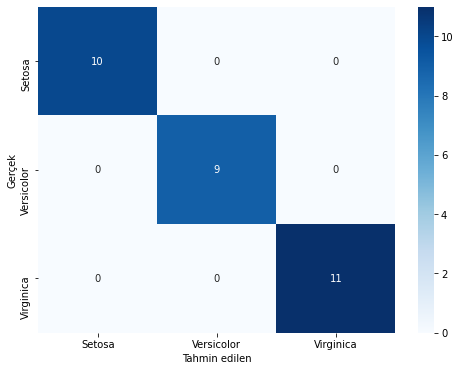

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#matrix oluşturma
cm = confusion_matrix(y_test, y_pred)

# Görselleştirme
labels = ['Setosa', 'Versicolor', 'Virginica']
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(8,6))
sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues) 
plt.xlabel('Tahmin edilen')
plt.ylabel('Gerçek')
plt.show()

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [44]:
# oluşturma
X, y = make_classification(n_samples=1000, n_classes=2, random_state=42)

# bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)

# Model
clf = LogisticRegression()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

# matrix oluşturma
cm = confusion_matrix(y_test, y_pred)

# Görselleştirme
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

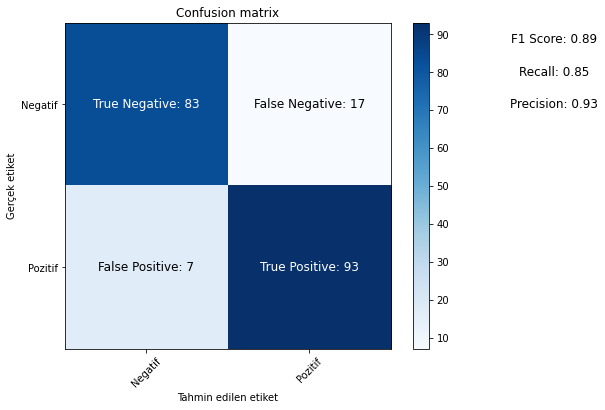

In [45]:
plt.figure(figsize=(8,6))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negatif', 'Pozitif'], rotation=45)
plt.yticks(tick_marks, ['Negatif', 'Pozitif'])
plt.xlabel('Tahmin edilen etiket')
plt.ylabel('Gerçek etiket')
plt.text(0, 0, f"True Negative: {tn}", ha="center", va="center", color="white", fontsize=12)
plt.text(0, 1, f"False Positive: {fp}", ha="center", va="center", color="black", fontsize=12)
plt.text(1, 0, f"False Negative: {fn}", ha="center", va="center", color="black", fontsize=12)
plt.text(1, 1, f"True Positive: {tp}", ha="center", va="center", color="white", fontsize=12)
plt.text(2.5, 0, f"Precision: {precision:.2f}", ha="center", va="center", color="black", fontsize=12)
plt.text(2.5, -0.2, f"Recall: {recall:.2f}", ha="center", va="center", color="black", fontsize=12)
plt.text(2.5, -0.4, f"F1 Score: {f1_score:.2f}", ha="center", va="center", color="black", fontsize=12)
plt.show()